<a href="https://colab.research.google.com/github/angelitaanap/Data_Mining/blob/main/K_Means.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from sklearn import datasets
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from scipy.spatial.distance import cdist
import matplotlib.pyplot as plt

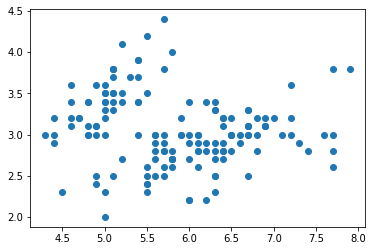

In [2]:
iris = datasets.load_iris()
features = iris.data
plt.scatter(features[:,0], features[:,1])
plt.show()

In [3]:
scaler = StandardScaler()
features_standardized = scaler.fit_transform(features)

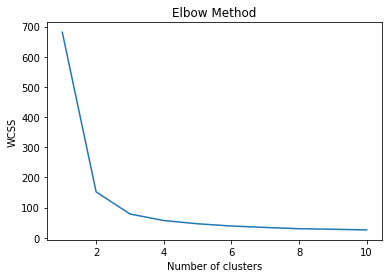

In [4]:
from sklearn.metrics import silhouette_samples, silhouette_score
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++',
                   max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(features)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

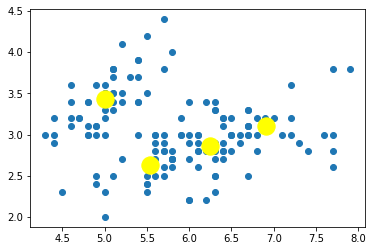

In [5]:
kmeans = KMeans(n_clusters = 4, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
pred_y = kmeans.fit_predict(features)
plt.scatter(features[:,0], features[:,1])
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s = 300, c = 'yellow')
plt.show()

In [6]:
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.pyplot import cm
import time
import itertools

In [ ]:
datasetPath = "dataku.txt"
dataset = np.loadtxt(datasetPath, delimiter = " ")

In [ ]:
k = 2
iterationCounter = 0
input = dataset
def initCentroid(dataIn, k):
    result = dataIn[np.random.choice(dataIn.shape[0], k, replace = False)]
    return result

In [ ]:
def plotClusterResult(listClusterMembers, centroid, iteration, converged):
    n = listClusterMembers.__len__()
    color = iter(cm.rainbow(np.linspace(0, 1, n)))
    plt.figure("result")
    plt.clf()
    plt.title("iteration-" + iteration)
    marker = itertools.cycle(('.', '*', '^', 'x', '+'))
    for i in range(n):
        col = next(color)
        memberCluster = np.asmatrix(listClusterMembers[i])
        plt.scatter(np.ravel(memberCluster[:, 0]), np.ravel(memberCluster[:,1]),
                    marker=marker.__next__(), s=100, c=col, label="klaster-"+str(i+1))
    for i in range(n):
        plt.scatter((centroid[i, 0]), (centroid[i, 1]), marker=marker.__next__(), 
                    c=col, label="centroid-" + str(i+1))
    if(converged == 0):
        plt.legend()
        plt.ion()
        plt.show()
        plt.pause(0.1)
    if(converged == 1):
        plt.legend()
        plt.show(block = True)

In [ ]:
def kMeans(data, centroidInit):
    nCluster = k
    global iterationCounter
    centroidInit = np.matrix(centroidInit)
    while(True):
        iterationCounter +=1
        euclideanMatrixAllCluster = np.ndarray(shape=(data.shape[0],0))
        for i in range (0, nCluster):
            centroidRepeated = np.repeat(centroidInit[i,:], data.shape[0], axis=0)
            deltaMatrix = abs(np.subtract(data, centroidRepeated))
            euclideanMatrix=np.sqrt(np.square(deltaMatrix).sum(axis=1))
            euclideanMatrixAllCluster = \
                np.concatenate((euclideanMatrixAllCluster,euclideanMatrix),axis=1)
        clusterMatrix = np.ravel(np.argmin(np.matrix(euclideanMatrixAllCluster),axis=1))
        listClusterMember = [[]for i in range(k)]
        for i in range(0, data.shape[0]):
            listClusterMember[np.asscalar(clusterMatrix[i])].append(data[i,:])
        newCentroid =np.ndarray(shape=(0, centroidInit.shape[1]))
        for i in range (0, nCluster):
            memberCluster = np.asmatrix(listClusterMember[i])
            centroidCluster = memberCluster.mean(axis=0)
            newCentroid = np.concatenate((newCentroid, centroidCluster), axis=0)
        print("iter: ",iterationCounter)
        print("centroid: ",newCentroid)
        if((centroidInit == newCentroid).all()):
            break
        centroidInit = newCentroid
        plotClusterResult(listClusterMember, centroidInit, str(iterationCounter),0)
        time.sleep(1)
    return listClusterMember, centroidInit

In [ ]:
centroidInit = initCentroid(input, k)
clusterResults, centroid = kMeans(input, centroidInit)
plotClusterResult(clusterResults, centroid, str(iterationCounter) + "(converged)", 1)

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans

In [ ]:
dataset = pd.read_csv('konsumen.csv')
dataset.keys()

In [ ]:
dataku = pd.DataFrame(dataset)
dataku.head()

In [ ]:
X = np.asarray(dataset)
print(X)

In [ ]:
plt.scatter(X[:,0], X[:,1], label='True Position')
plt.xlabel('Gaji')
plt.ylabel('pengeluaran')
plt.title('grafik penyebaran data konsumen')
plt.show

In [ ]:
kmeans = KMeans(n_clusters=2)
kmeans.fit(X)

In [ ]:
print(kmeans.cluster_centers_)

In [ ]:
plt.scatter(X[:,0], X[:,1], c=kmeans.labels_, cmap="rainbow")
plt.xlabel('Gaji')
plt.ylabel('pengeluaran')
plt.title('grafik hasil klastering data gaji dan pengeluaran konsumen')
plt.show